In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv('/Users/matin/Library/Mobile Documents/com~apple~CloudDocs/Coding Dojo Python/Clusterización /cust_seg.csv')
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [3]:
df['Defaulted'].fillna(df['Defaulted'].mode()[0], inplace=True)

In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        850 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [7]:
round(df['Defaulted'].value_counts()/df.shape[0] * 100, 2)
# Porcentaje de clientes que han caído en mora

0.0    78.47
1.0    21.53
Name: Defaulted, dtype: float64

In [15]:
import seaborn as sns

La mayoría de clientes han pagado a tiempo

In [8]:
# Instancia de escalador estándar
scaler = StandardScaler()
# Ajustar y transformar datos
df_scaled = scaler.fit_transform(df)

In [10]:
def cluster(model, X_scaled, method):
  # Seed
  np.random.seed(35735)
  # Estimacion
  model.fit(X_scaled)
  # Numero de clusters
  clusters = model.labels_
  num_clusters = len(set(clusters[clusters >= 0]))
  # Coeficiente de silueta
  silh_score = silhouette_score(X_scaled, model.labels_)

  # Results
  print(f'\nModel Report\n{method}\n')
  print(f'Number of clusters: {num_clusters}\n')
  print(f'Silhouette Coefficient: {silh_score:.3f}')

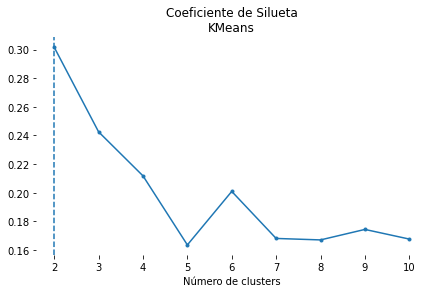

In [16]:
# KMeans

np.random.seed(35735)
silhouette_scores_kmeans = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i, random_state = 2731)
  kmeans.fit(df_scaled)
  silhouette_scores_kmeans.append(silhouette_score(df_scaled, kmeans.labels_))

# Grafico
plt.plot(range(2, 11), silhouette_scores_kmeans, marker = '.')
plt.axvline(x = 2, linestyle = '--')
plt.title('Coeficiente de Silueta\nKMeans')
plt.ylabel('')
plt.xlabel('Número de clusters')
plt.xticks(range(2, 11))
sns.despine(left = True, bottom = True)
plt.gcf().set_size_inches(7, 4);

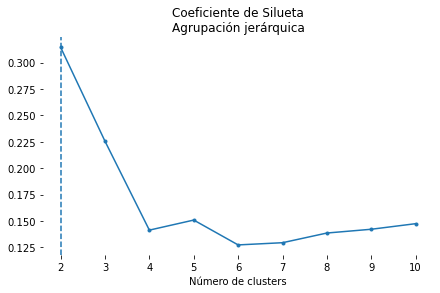

In [17]:
np.random.seed(35735)
silhouette_scores_hc = []
for i in range(2, 11):
  hc = AgglomerativeClustering(n_clusters = i)
  hc.fit(df_scaled)
  silhouette_scores_hc.append(silhouette_score(df_scaled, hc.labels_))

# Grafico
plt.plot(range(2, 11), silhouette_scores_hc, marker = '.')
plt.axvline(x = 2, linestyle = '--')
plt.title('Coeficiente de Silueta\nAgrupación jerárquica')
plt.ylabel('')
plt.xlabel('Número de clusters')
plt.xticks(range(2, 11))
sns.despine(left = True, bottom = True)
plt.gcf().set_size_inches(7, 4);

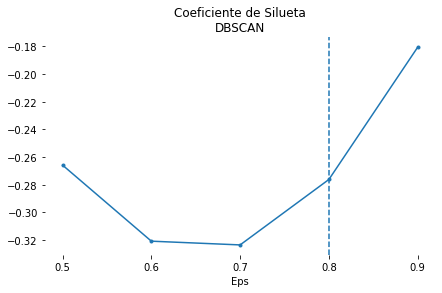

In [19]:
np.random.seed(35735)
silhouette_scores_dbs = []
for i in np.arange(0.5, 1.0, 0.1):
  dbs = DBSCAN(eps = i, min_samples = 5)
  dbs.fit(df_scaled)
  silhouette_scores_dbs.append(silhouette_score(df_scaled, dbs.labels_))

# Grafico
plt.plot(np.arange(0.5, 1.0, 0.1), silhouette_scores_dbs, marker = '.')
plt.axvline(x = 0.8, linestyle = '--')
plt.title('Coeficiente de Silueta\nDBSCAN')
plt.ylabel('')
plt.xlabel('Eps')
plt.xticks(np.arange(0.5, 1.0, 0.1))
sns.despine(left = True, bottom = True)
plt.gcf().set_size_inches(7, 4);

### Modelos

In [22]:
kmeans = KMeans(n_clusters = 2, random_state = 2731)
cluster(kmeans, df_scaled, 'KMeans')


Model Report
KMeans

Number of clusters: 2

Silhouette Coefficient: 0.302


In [23]:
hc = AgglomerativeClustering(n_clusters = 2)
cluster(hc, df_scaled, 'Agrupación jerárquica')


Model Report
Agrupación jerárquica

Number of clusters: 2

Silhouette Coefficient: 0.315


In [24]:
dbs = DBSCAN(eps = 0.8, min_samples = 5)
cluster(dbs, df_scaled, 'DBSCAN')


Model Report
DBSCAN

Number of clusters: 8

Silhouette Coefficient: -0.276


In [ ]:
# Se debe generar dos cluster